In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns           

import numpy as np

import scipy.stats as stats
import math

pd.set_option('display.max_rows',1600)
pd.set_option('display.max_columns',1600)

import random
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay


# Images need to be loaded, read and saved in an array.

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import save_img
import os
from os.path import join
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder,filename), target_size=(224, 224)) 
        img = img_to_array(img)
        img = img.reshape(1,224,224,3)
        if img is not None:
            images.append(img)
    return images

# load the model in order to extract the needed features from the images

In [5]:
from keras.applications.vgg16 import VGG16
from keras import models, Model
import ssl
from keras.models import load_model


def create_model(save_filepath):
    # loading vgg16 model and using all the layers until the 2 to the last to use all the learned cnn layers
    ssl._create_default_https_context = ssl._create_unverified_context
    vgg = VGG16(include_top=True)
    model2 = Model(vgg.input, vgg.layers[-2].output)
    model2.save(save_filepath,include_optimizer=False) # saving the model just in case
    return model2
def load_model_from_path(save_filepath):
    # loading the model from the saved path
    model = load_model(save_filepath,compile=False)
    return model

# predicting from the created model

In [6]:
def get_preds(all_imgs_arr,model):
    # getting the extracted features - final shape (number_of_images, 4096)
    preds = model.predict(all_imgs_arr)
    return preds

# extracted feature vectors used to compute image similarity

In [7]:
from annoy import AnnoyIndex
from scipy import spatial


# To Save the model path

In [8]:
filename=(r"C:\Users\Raviteja\Documents\Machine_Learning\Data")
a1=create_model(filename)
a2=load_model_from_path(filename)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Raviteja\Documents\Machine_Learning\Data\assets


# To read the data (folder) and input image(file) 

In [9]:
from scipy.misc import toimage
from scipy.misc import imshow

from IPython.display import display, Image, HTML

# data containinng ~5k images
folder=(r"C:\Users\Raviteja\Documents\Machine_Learning\Sample")

# input image for the similar images 
file=(r"C:\Users\Raviteja\Documents\Machine_Learning\Sample\0.jpg")


imgs=load_images_from_folder(folder)

img1 = load_img(file, target_size=(224, 224)) 
img1 = img_to_array(img1)
img1 = img1.reshape(1,224,224,3)
#len(imgs)
#display((imgs[0])
#a=imgs[0].shape
#b=a[1]*a[0]
#c=a[2]*a[3]
#dat=np.reshape(imgs[0], (b,c))
#plt.imshow(dat, interpolation='nearest')
#plt.show()

# To get similar images for an input image

In [27]:
def get_nearest_similarity(predict,images,origimages, K):
    simi=[]
    output=[]
    for i in range(len(images)):
        mast_vector = images[i]
        neighb_vector = predict
        r=np.reshape(mast_vector,(1,np.product(mast_vector.shape)))
        t=np.reshape(neighb_vector,(1,np.product(neighb_vector.shape)))
        similari = 1 - spatial.distance.cosine(r, t)
        simi.append(similari)
    simil=sorted(simi,reverse=True)
    m=0;
    while(m<K+2):
        for j in range(len(images)):
            if(simi[j]==simil[m]):
                a=origimages[j].shape
                print(simil[m])
                output.append(j)
                b=a[1]*a[0]
                c=a[2]*a[3]
                dat=np.reshape(origimages[j], (b,c))
                plt.imshow(dat, interpolation='nearest')
                plt.show()
        m+=1


# To predict the images from model

1.0


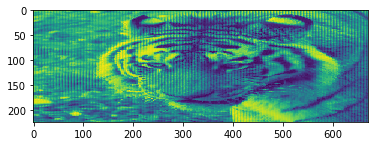

0.7811785340309143


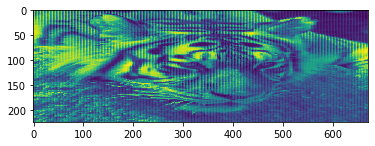

0.7451741099357605


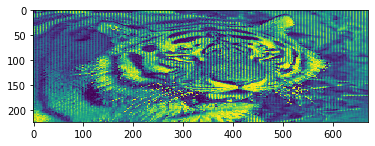

0.7072101831436157


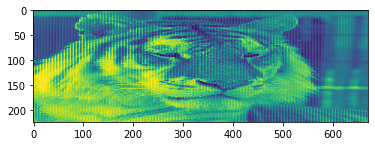

0.682128369808197


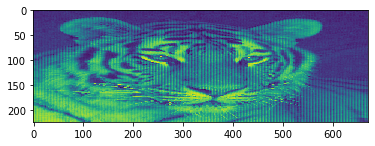

0.6505375504493713


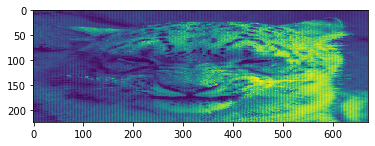

0.6440831422805786


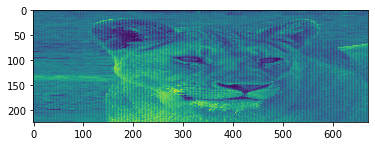

0.6317368745803833


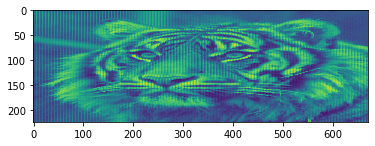

0.6214008927345276


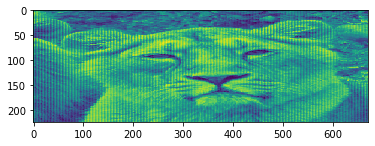

0.6141753792762756


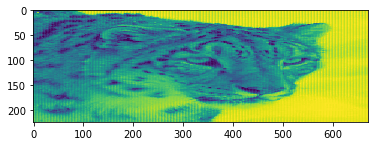

0.6130993962287903


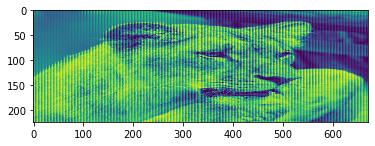

In [28]:
pred2=get_preds(img1,a2)
predicts=[]
for i in range(len(imgs)):
    z=get_preds(imgs[i],a2)
    predicts.append(z)
    
# here 9 similar images to the input image are obtained
a=get_nearest_similarity(pred2,predicts,imgs,9)

# for original images

In [29]:
def gett_similarity(predict,images,origimages, K):
    simi=[]
    output=[]
    for i in range(len(images)):
        mast_vector = images[i]
        neighb_vector = predict
        r=np.reshape(mast_vector,(1,np.product(mast_vector.shape)))
        t=np.reshape(neighb_vector,(1,np.product(neighb_vector.shape)))
        similari = 1 - spatial.distance.cosine(r, t)
        simi.append(similari)
    simil=sorted(simi,reverse=True)
    m=0;
    while(m<K+2):
        for j in range(len(images)):
            if(simi[j]==simil[m]):
                a=origimages[j].shape
                output.append(j)
        m+=1
        
    return output

In [42]:
# here 9 similar images to the input image are obtained
d=gett_similarity(pred2,predicts,imgs,9)

print(d)

I=[]

for filename in os.listdir(folder):
    I.append(filename)
    
    

[0, 21, 15, 4, 22, 9, 20, 7, 28, 39, 5]
['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '19.jpg', '2.jpg', '21.jpg', '25.jpg', '26.jpg', '27.jpg', '29.jpg', '3.jpg', '30.jpg', '33.jpg', '34.jpg', '36.jpg', '37.jpg', '38.jpg', '4.jpg', '40.jpg', '41.jpg', '49.jpg', '5.jpg', '52.jpg', '53.jpg', '54.jpg', '6.jpg', '66.jpg', '7.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '8.jpg', '9.jpg']


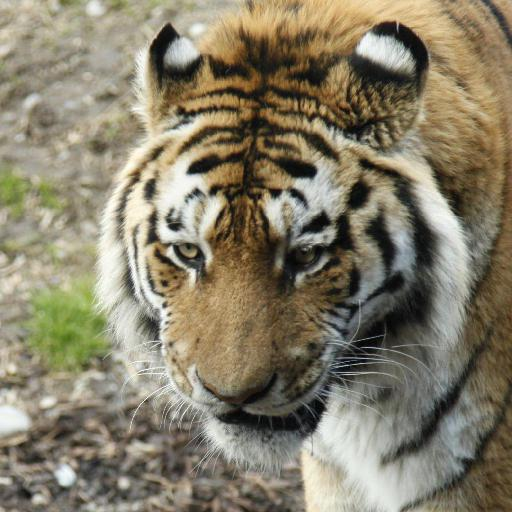

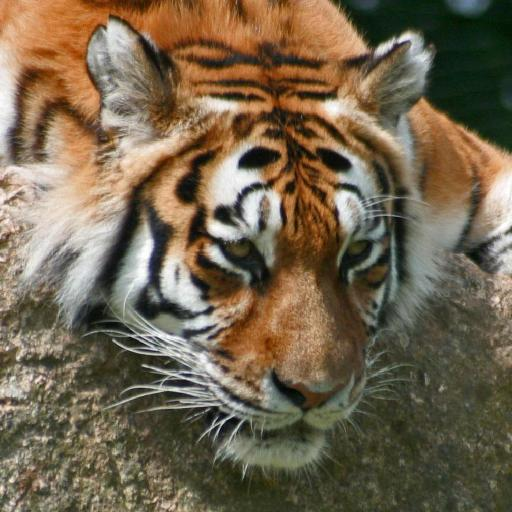

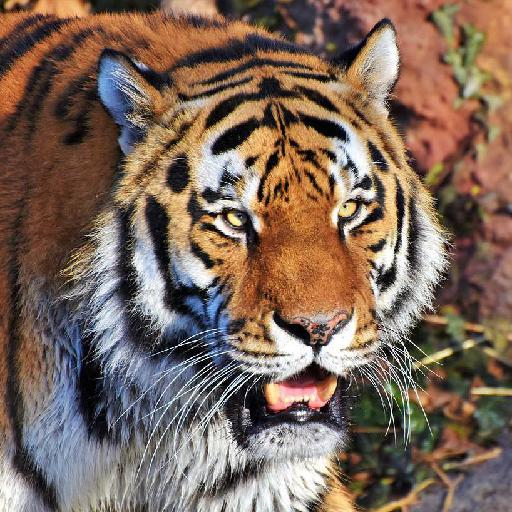

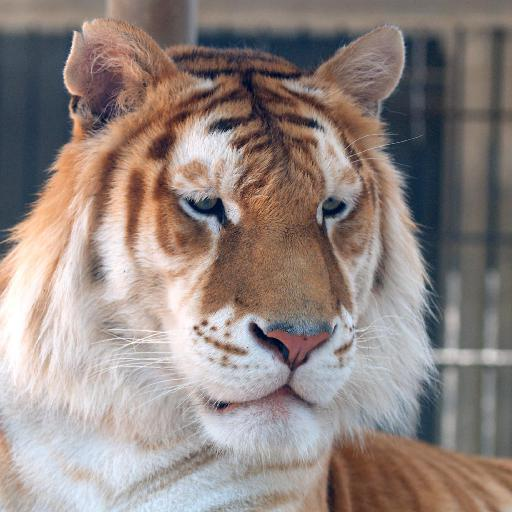

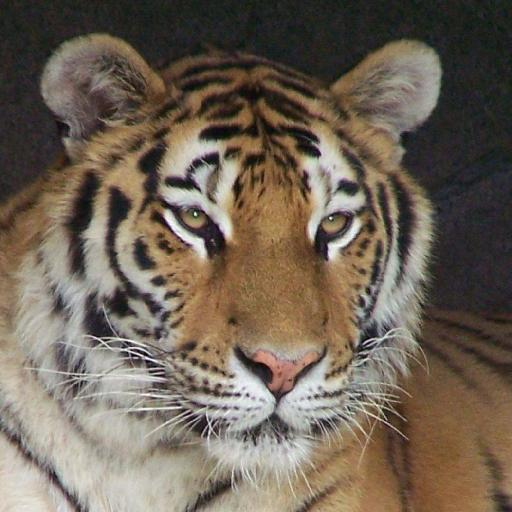

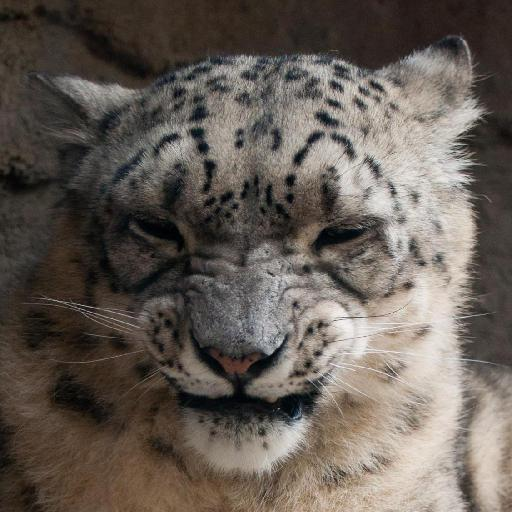

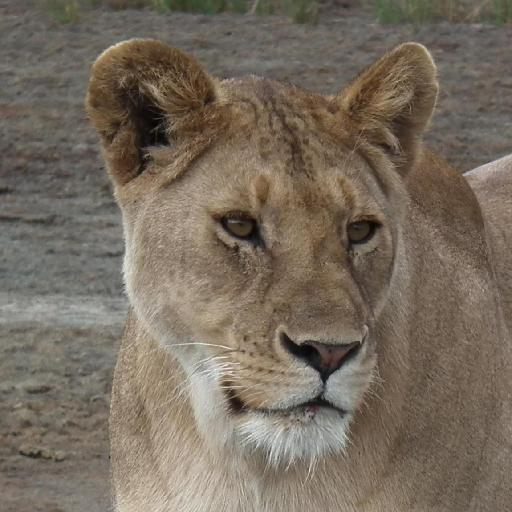

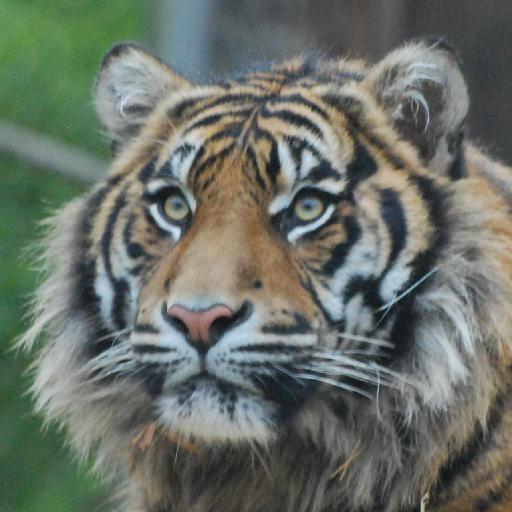

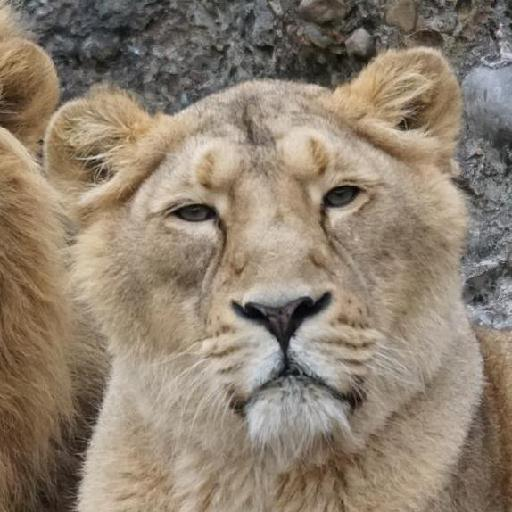

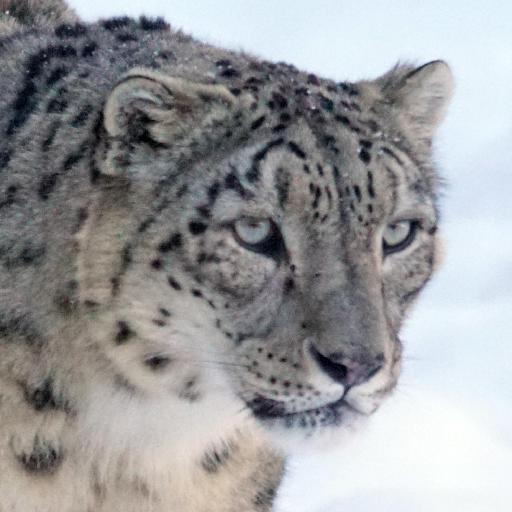

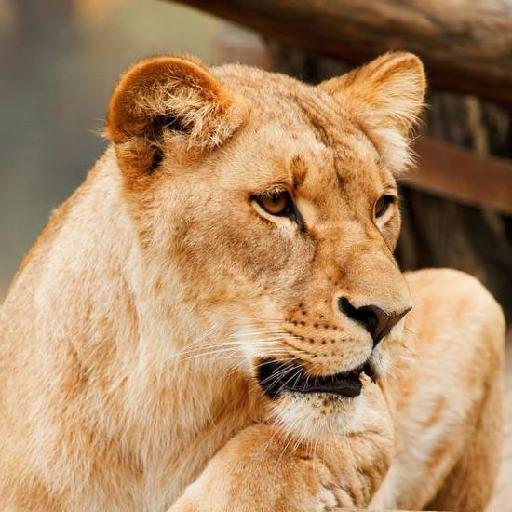

In [43]:
from IPython.display import display, Image, HTML
DATA_DIR = r"..\Machine_Learning"
IMAGE_DIR = os.path.join(DATA_DIR, "Sample")

for i in range(len(d)):
    g=d[i]
    s=str(I[g])
    iam=s+".jpg"
    path=os.path.join(IMAGE_DIR, s)
    display(Image(path))
    plt.show()